In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('covertype.csv')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
df =df.rename(columns={'Unnamed: 0':'Feature_1','Unnamed: 1':'Feature_2','Unnamed: 2':'Feature_3'})

In [4]:
df

,Feature_1,Feature_2,Feature_3,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Feature_1                           581012 non-null  int64
 1   Feature_2                           581012 non-null  int64
 2   Feature_3                           581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [6]:
df.describe()

,Feature_1,Feature_2,Feature_3,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
print ("Number of columns = ",df.shape[1])
print ("Number of rows    = ",df.shape[0])

Number of columns =  55
Number of rows    =  581012


In [8]:
df.isnull().sum()

Feature_1                             0
Feature_2                             0
Feature_3                             0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
for col in df:
    print(col, " -> ",df[col].unique())

Feature_1  ->  [2596 2590 2804 ... 3858 3856 3852]
Feature_2  ->  [ 51  56 139 155  45 132  49  59 201 151 134 214 157 259  72   0  38  71
 209 114  54  22 135 163 148 117 122 105 102  23  41 125  92  98 354 347
 346 330 128  68  94  99  66 100 323  79  81 315  74  11  42  75 107  90
  40  63  13  80 166   6  30 118 160 326 153 143 352  14 358 332  18 306
 173  31 164  34  84 170 211  32  57 348 333 324  88 111  53  58  76  17
 124 119 320 112  83   1  37 356 307   7  12 344 228 284 299 220   2  95
 289  21  20 200 349 328 221 257 276 196 189 130 357  15   8 288 129  28
  86 292 115  29 180 116  46 256 338 127 319  89  43 188  50 138 312   9
  10  36 167 260 187 279 245  27 359  16  48 149  60  77 230 152  70 325
 126 222 109  85  25 176 144 175 162  73  39  78 331 329 355  87 285 108
 106  24  52 261 232 246 342  61 141 216 236 254 336 278  62 237 281  69
 251 150 185 110 103 243 215 238 317 252 136 131 133 123 120 351 202 194
 101 282 258 270  65 203 353 174 140 142 267   5 343 104 2

In [11]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type'],
    

In [12]:
outliers_number={}
for col in df:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR= q3-q1
    lower= q1 - 1.5 * IQR
    upper= q3 + 1.5 * IQR
    outlier= df[(df[col]<lower) | (df[col]>upper)]
    outliers_number[col]=outlier.shape[0]
print(outliers_number)

{'Feature_1': 15569, 'Feature_2': 0, 'Feature_3': 15316, 'Elevation': 14557, 'Aspect': 31463, 'Slope': 669, 'Horizontal_Distance_To_Hydrology': 17433, 'Vertical_Distance_To_Hydrology': 15672, 'Horizontal_Distance_To_Roadways': 7832, 'Hillshade_9am': 31157, 'Hillshade_Noon': 0, 'Hillshade_3pm': 29884, 'Horizontal_Distance_To_Fire_Points': 0, 'Wilderness_Area': 36968, 'Soil_Type1': 3031, 'Soil_Type2': 7525, 'Soil_Type3': 4823, 'Soil_Type4': 12396, 'Soil_Type5': 1597, 'Soil_Type6': 6575, 'Soil_Type7': 105, 'Soil_Type8': 179, 'Soil_Type9': 1147, 'Soil_Type10': 32634, 'Soil_Type11': 12410, 'Soil_Type12': 29971, 'Soil_Type13': 17431, 'Soil_Type14': 599, 'Soil_Type15': 3, 'Soil_Type16': 2845, 'Soil_Type17': 3422, 'Soil_Type18': 1899, 'Soil_Type19': 4021, 'Soil_Type20': 9259, 'Soil_Type21': 838, 'Soil_Type22': 33373, 'Soil_Type23': 57752, 'Soil_Type24': 21278, 'Soil_Type25': 474, 'Soil_Type26': 2589, 'Soil_Type27': 1086, 'Soil_Type28': 946, 'Soil_Type29': 115247, 'Soil_Type30': 30170, 'Soil_Ty

## Data visualizations (EDA)

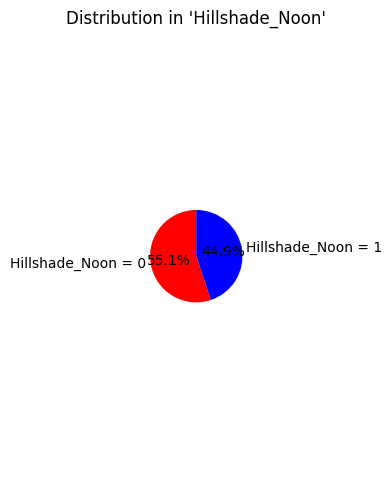

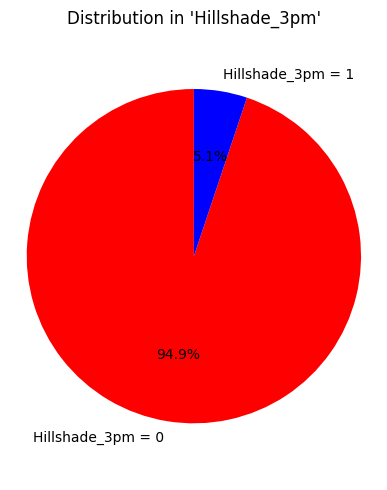

C:\Users\MOHAMED\AppData\Local\Temp\ipykernel_296\428133510.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


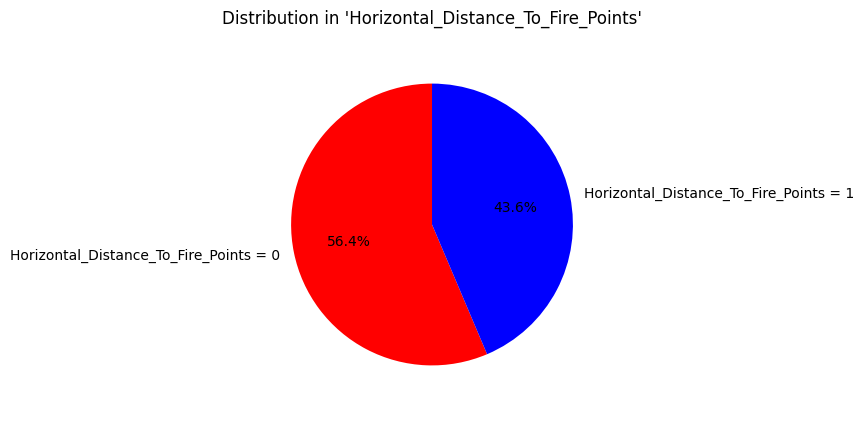

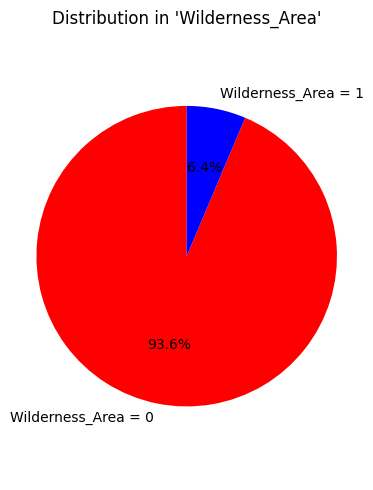

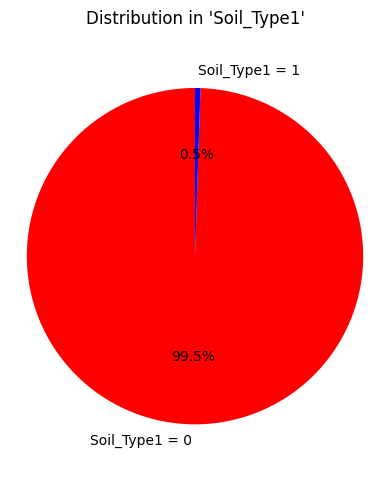

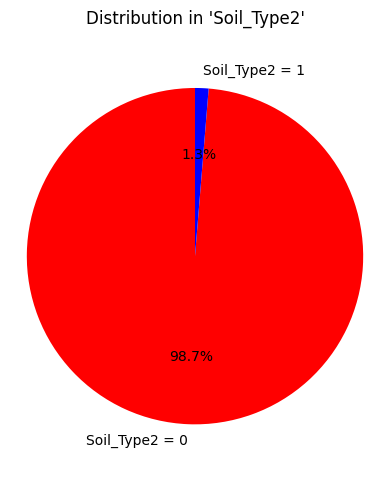

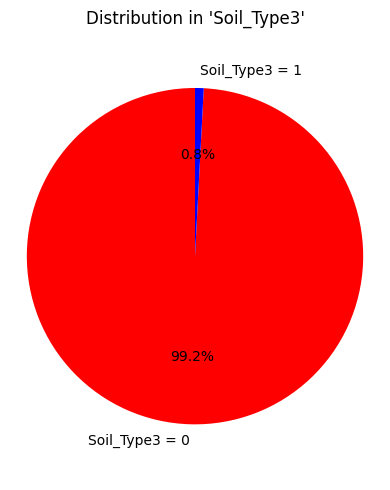

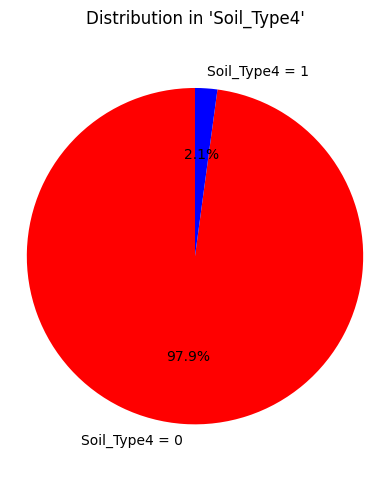

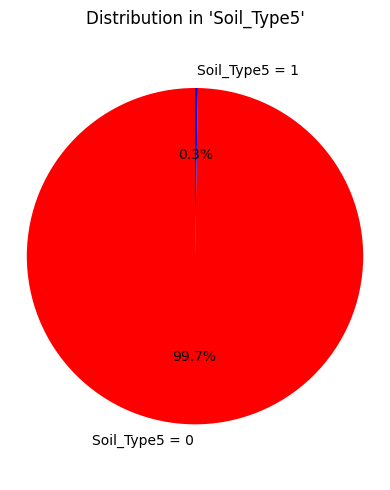

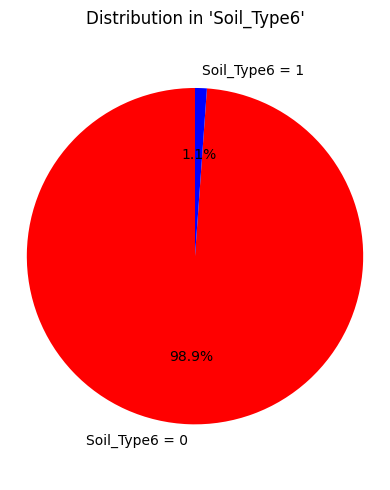

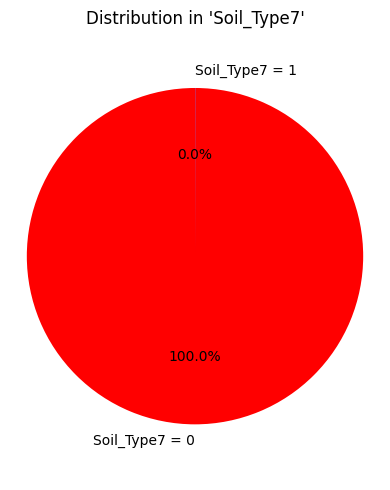

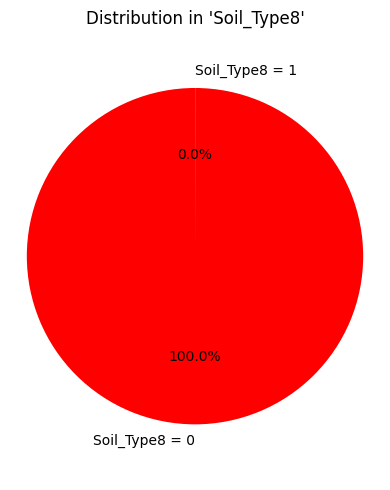

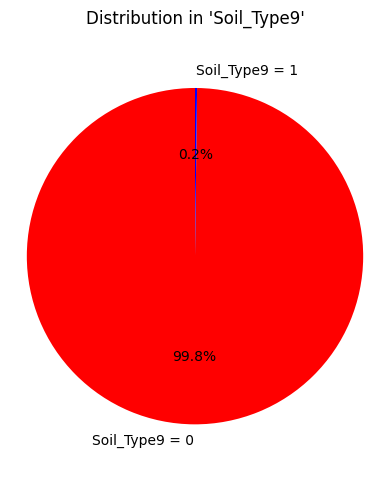

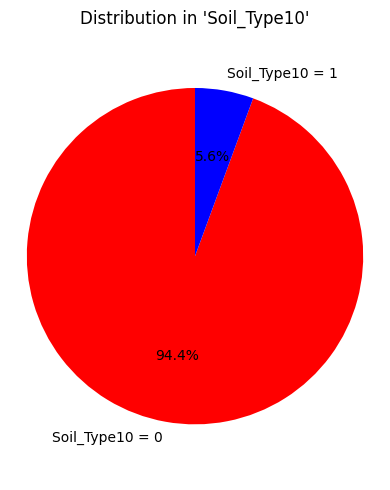

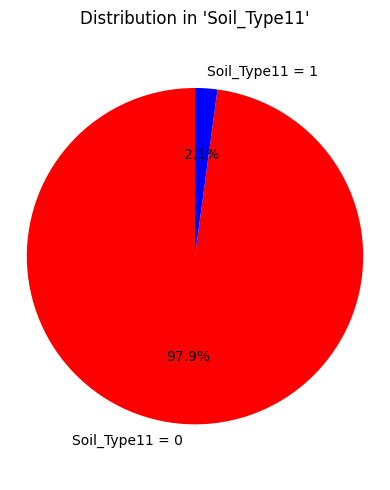

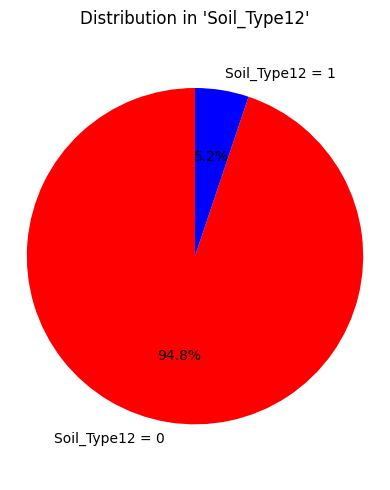

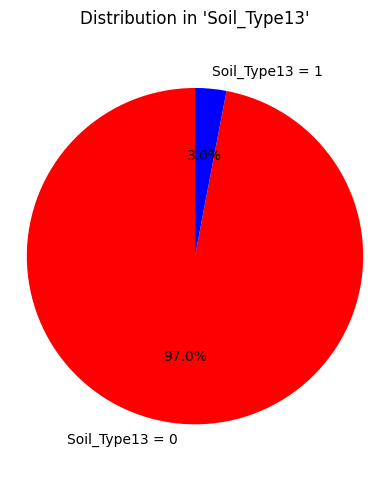

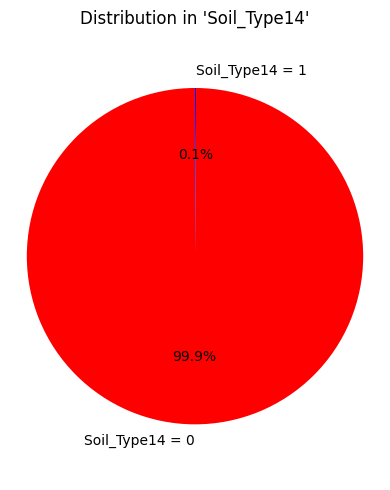

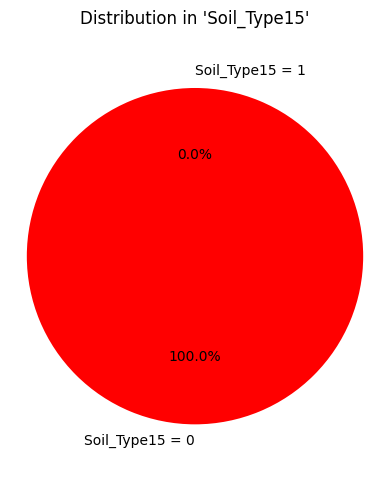

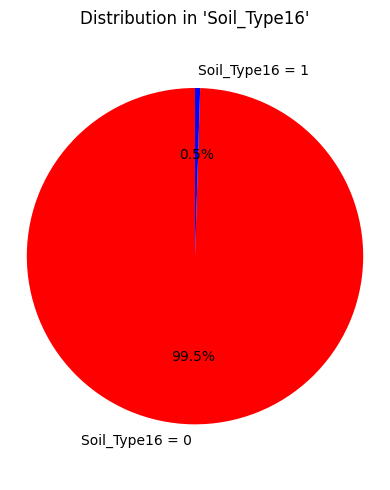

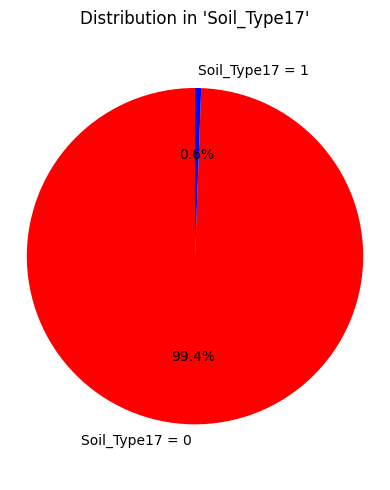

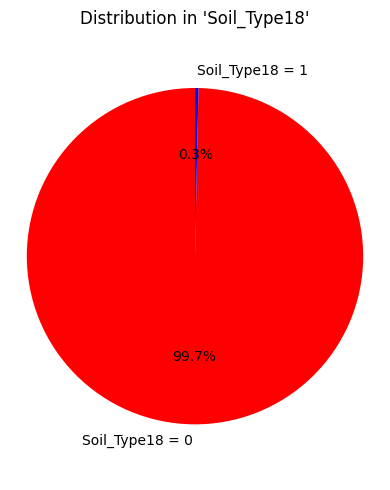

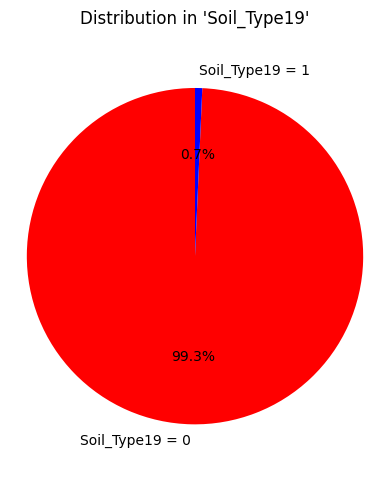

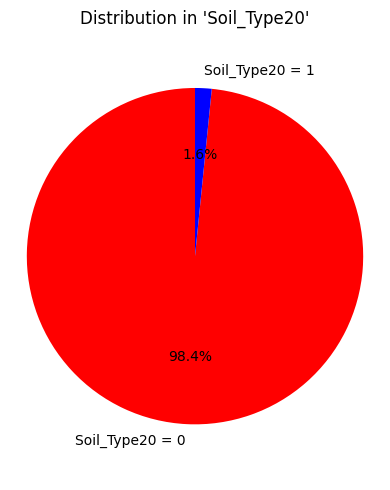

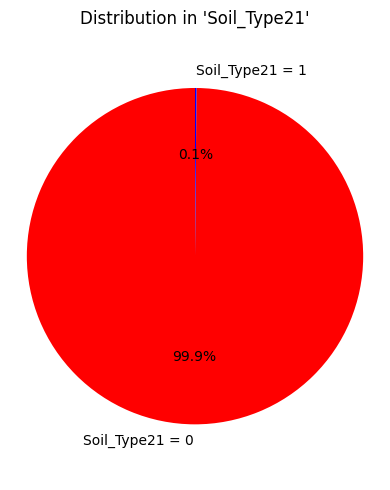

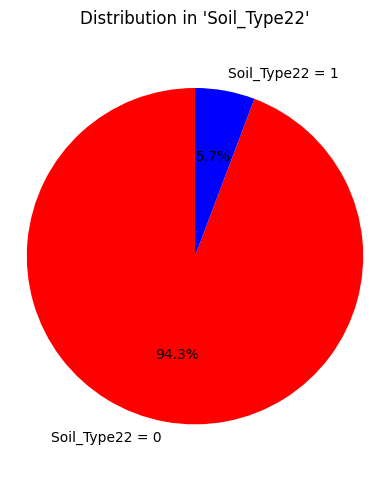

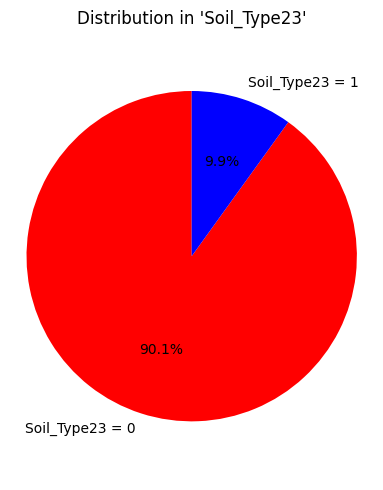

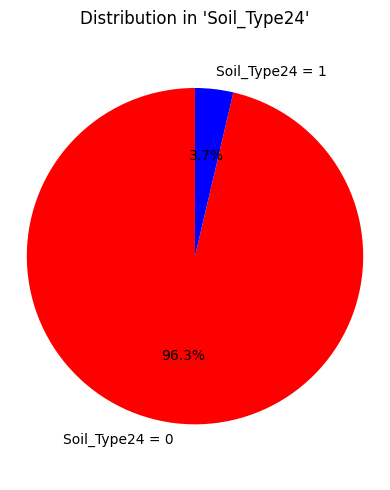

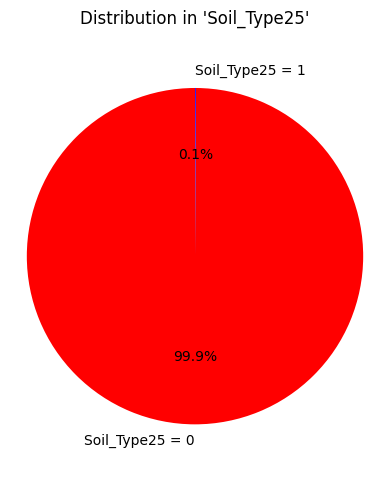

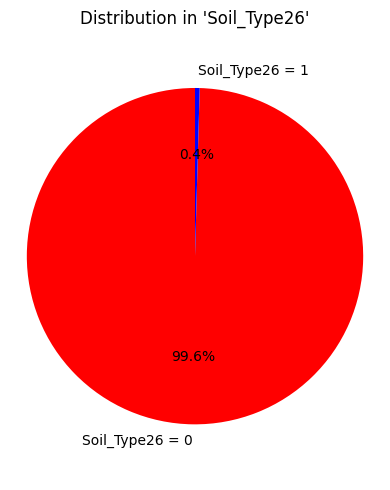

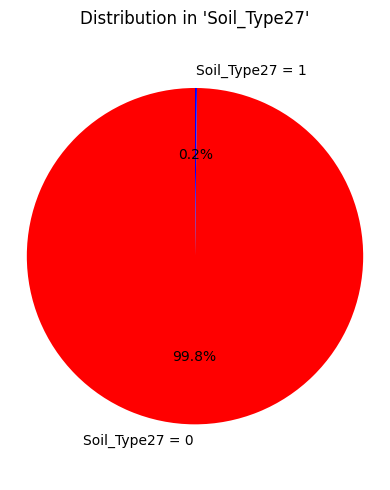

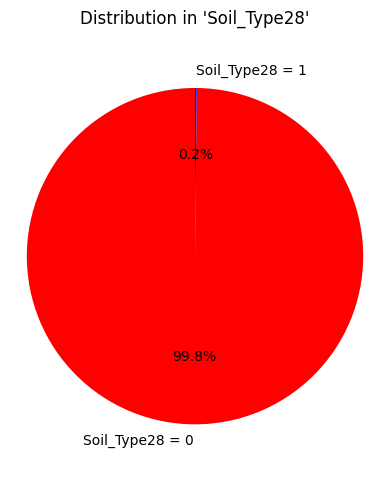

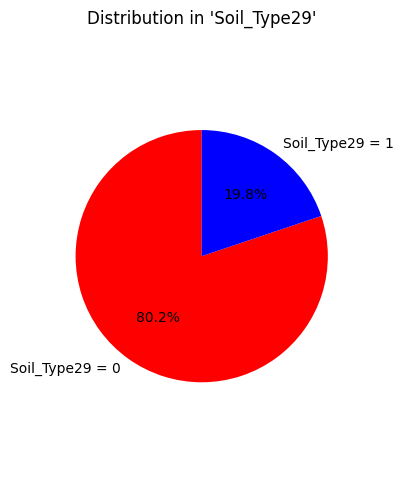

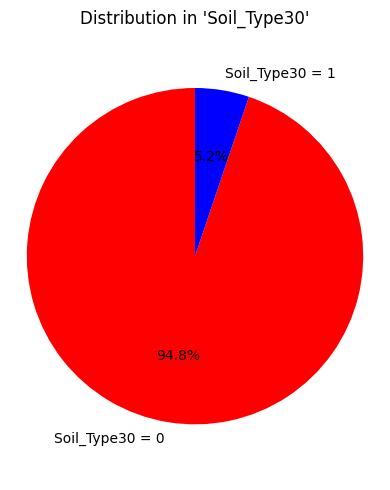

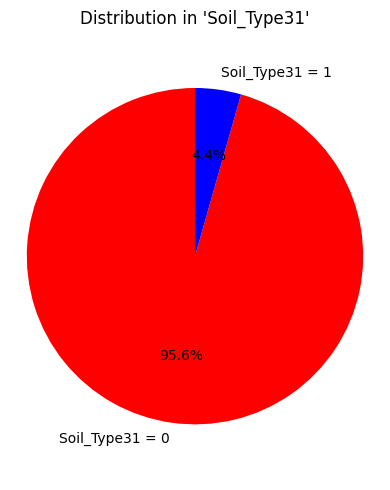

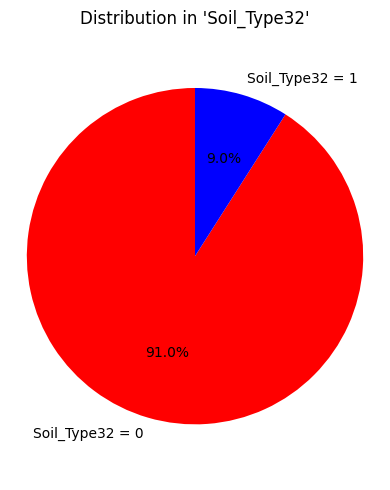

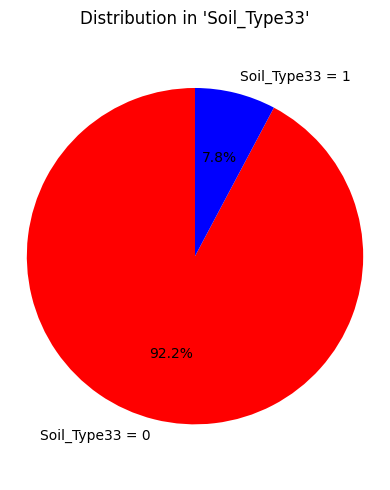

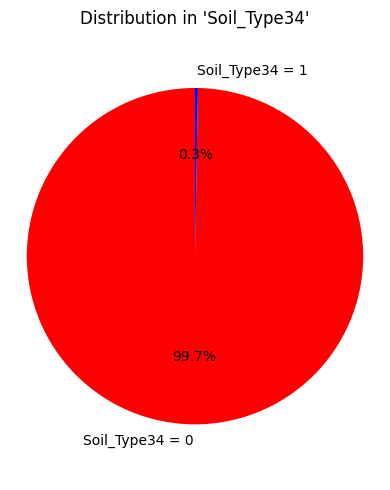

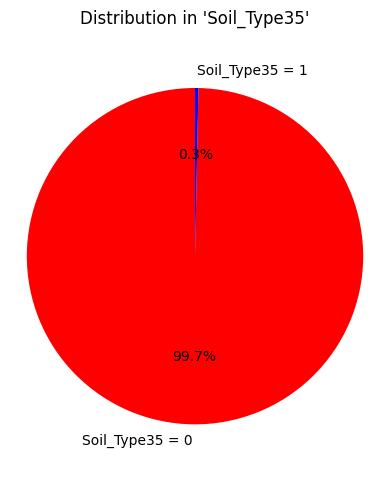

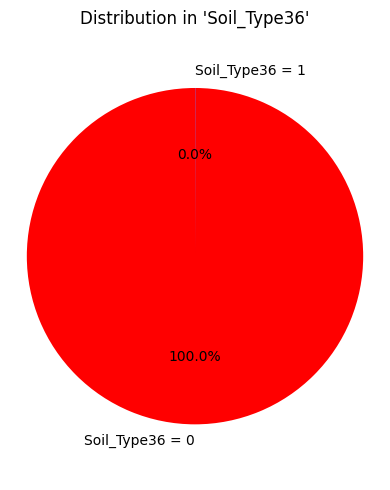

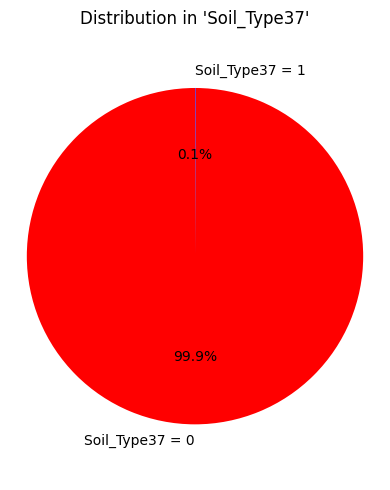

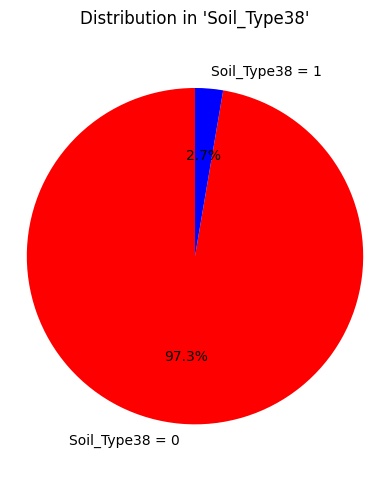

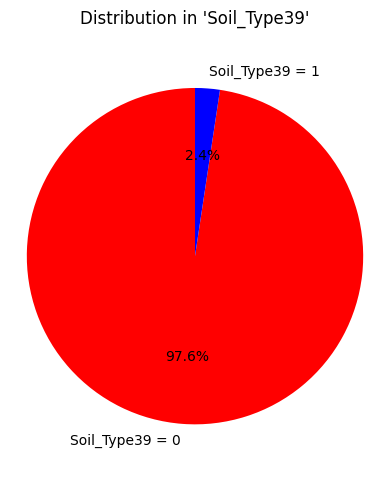

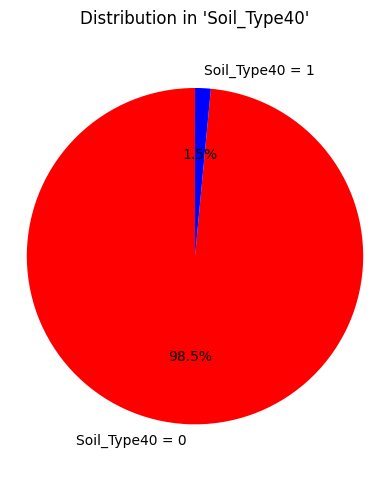

In [13]:
binary_cols = [col for col in df.columns if set(df[col].unique()).issubset({0, 1})]

# Step 2: Plot a pie chart for each binary column
for col in binary_cols:
    counts = df[col].value_counts().sort_index()  # 0s and 1s
    labels = [f"{col} = 0", f"{col} = 1"]

    plt.figure(figsize=(4,5))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["red", "blue"])
    plt.title(f"Distribution in '{col}'")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

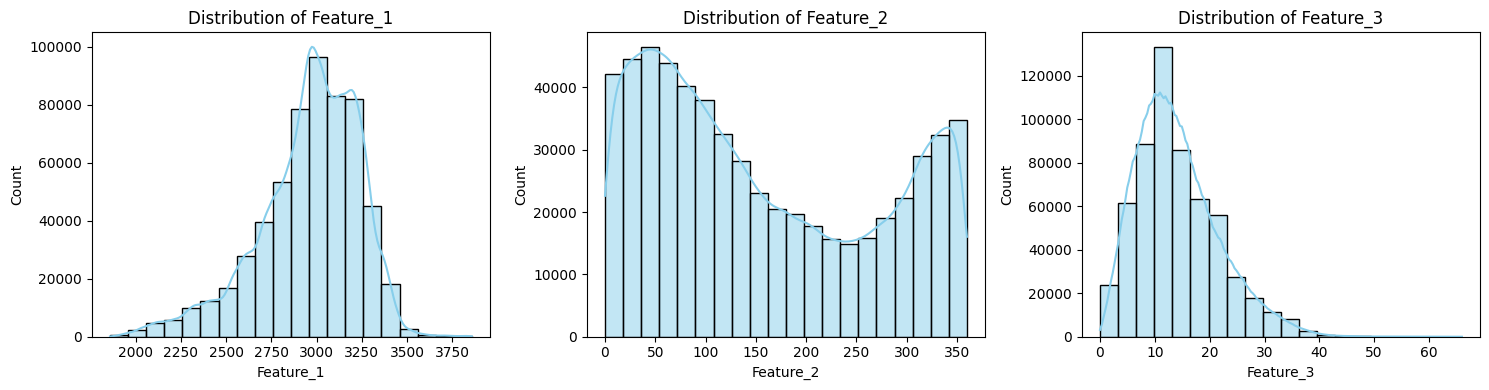

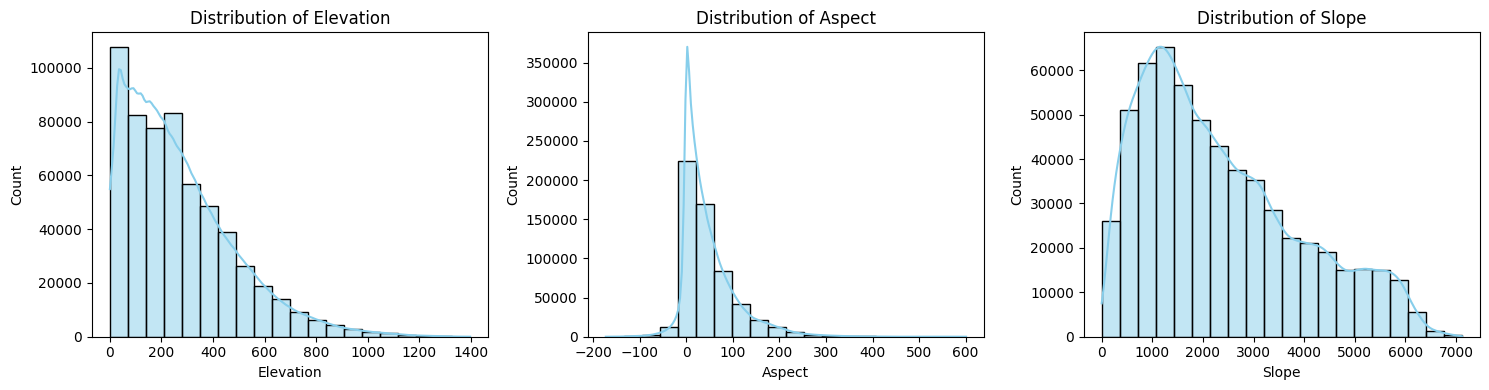

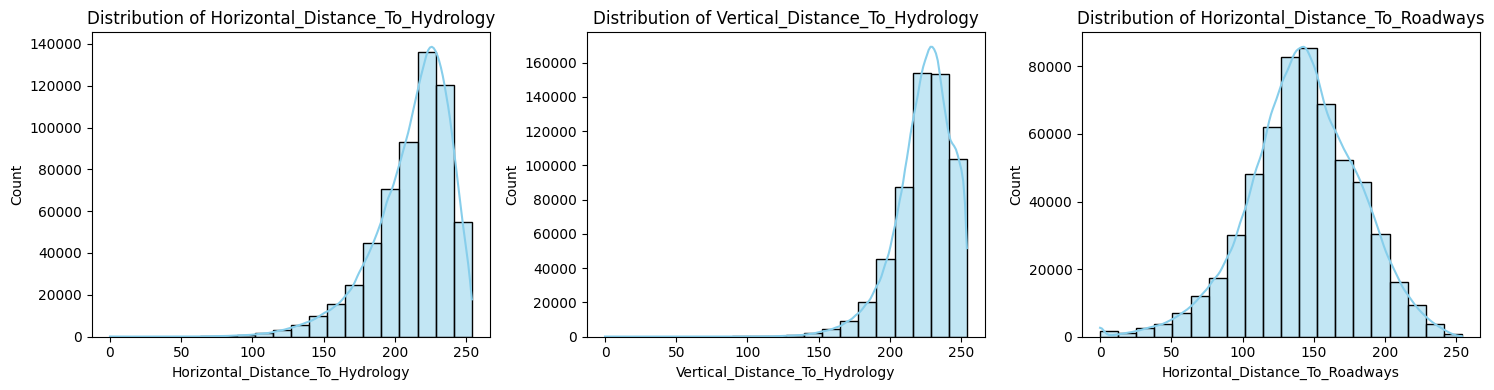

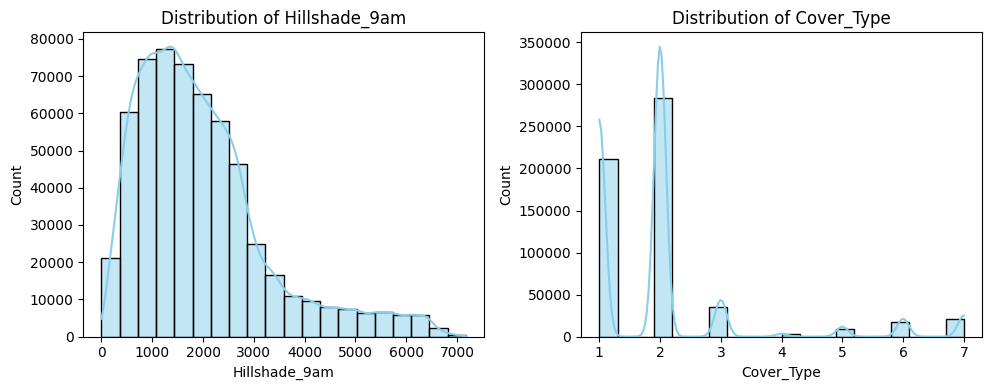

In [14]:
non_binary_cols = [col for col in df.columns if not set(df[col].unique()).issubset({0, 1})]

# Plot histograms in batches of 3 columns per row
for i in range(0, len(non_binary_cols), 3):
    cols = non_binary_cols[i:i+3]
    plt.figure(figsize=(15, 4))

    for j, col in enumerate(cols):
        plt.subplot(1, 3, j + 1)
        sns.histplot(df[col], kde=True, bins=20, color='skyblue')
        plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

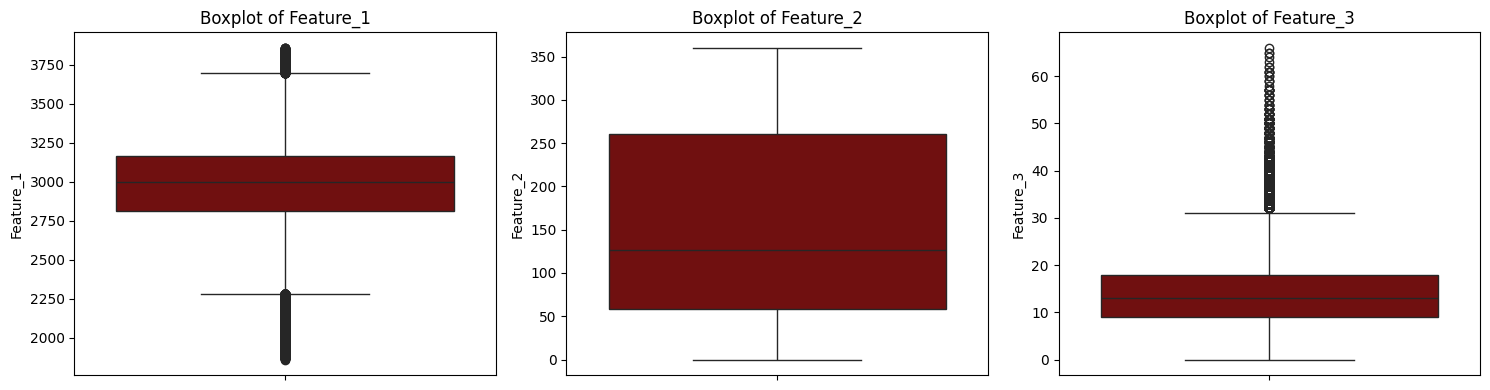

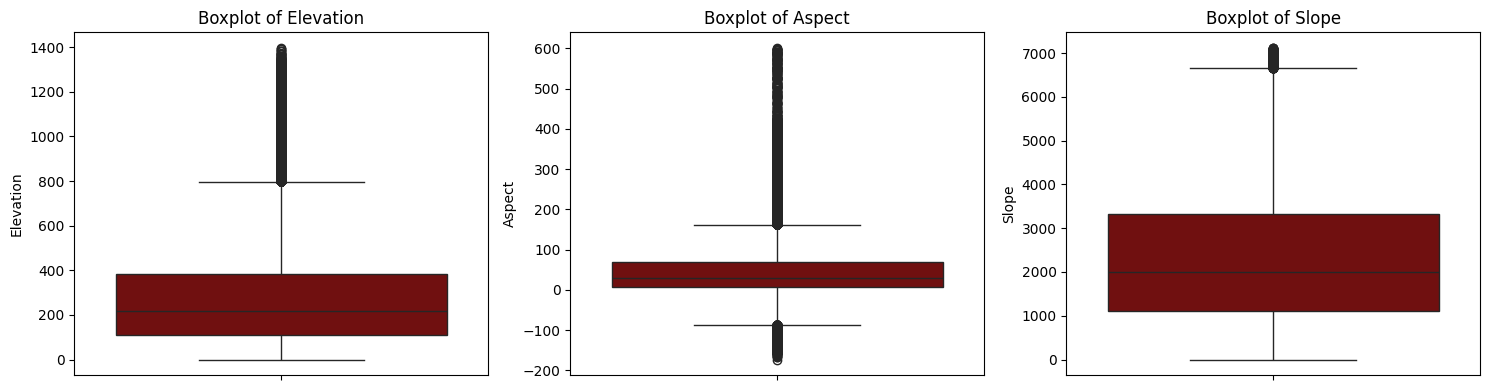

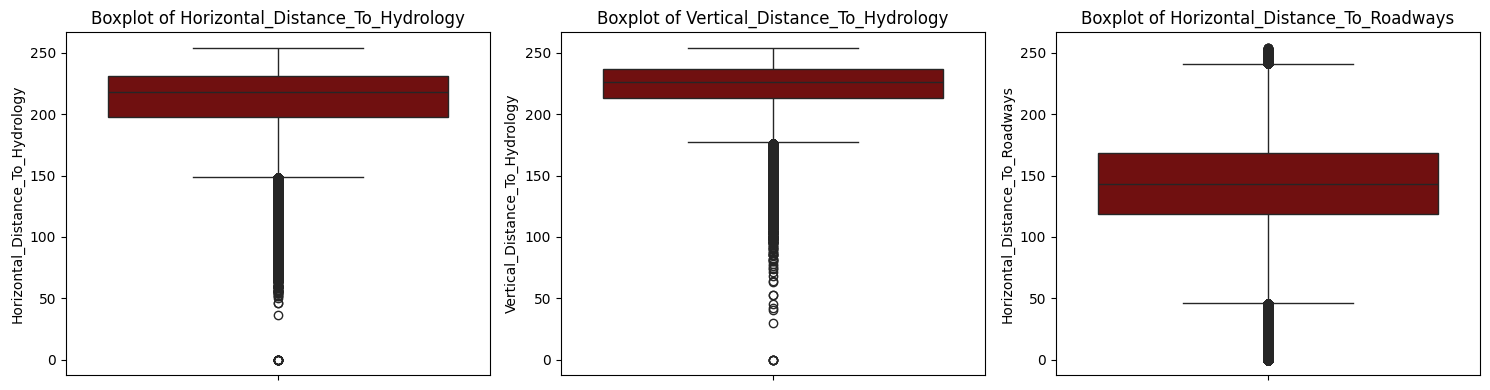

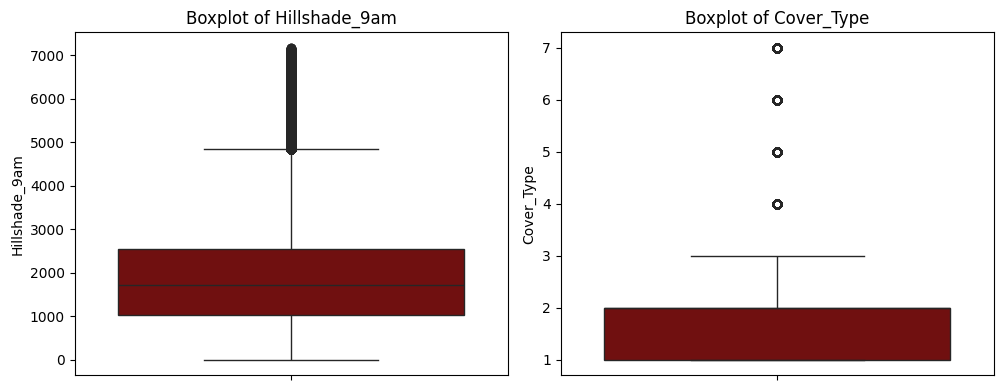

In [15]:
non_binary_cols = [col for col in df.columns if not set(df[col].unique()).issubset({0, 1})]

# Plot boxplots in batches of 3 per row
for i in range(0, len(non_binary_cols), 3):
    cols = non_binary_cols[i:i+3]
    plt.figure(figsize=(15, 4))

    for j, col in enumerate(cols):
        plt.subplot(1, 3, j + 1)
        sns.boxplot(data=df, y=col, color='maroon')
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

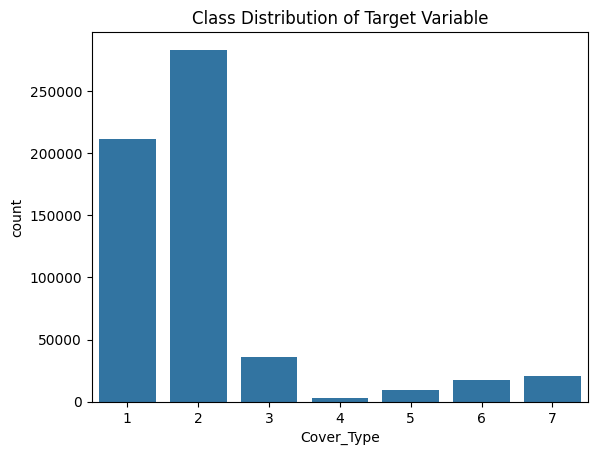

In [24]:
sns.countplot(x=df['Cover_Type'])
plt.title("Class Distribution of Target Variable")
plt.show()

### Dealing with outliers

In [22]:
def cap_outliers_iqr(df, exclude_col='Cover_Type'):
    for col in df.columns:
        if col == exclude_col or set(df[col].unique()).issubset({0, 1}):
            continue  # Skip excluded or binary columns
        
        Q1 = df[col].quantile(0.20)
        Q3 = df[col].quantile(0.80)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)  # Modifies df directly


In [23]:
outliers_number={}
for col in df:
    q1=df[col].quantile(0.20)
    q3=df[col].quantile(0.80)
    IQR= q3-q1
    lower= q1 - 1.5 * IQR
    upper= q3 + 1.5 * IQR
    outlier= df[(df[col]<lower) | (df[col]>upper)]
    outliers_number[col]=outlier.shape[0]
print(outliers_number)

{'Feature_1': 0, 'Feature_2': 0, 'Feature_3': 0, 'Elevation': 0, 'Aspect': 0, 'Slope': 0, 'Horizontal_Distance_To_Hydrology': 0, 'Vertical_Distance_To_Hydrology': 0, 'Horizontal_Distance_To_Roadways': 0, 'Hillshade_9am': 0, 'Hillshade_Noon': 0, 'Hillshade_3pm': 29884, 'Horizontal_Distance_To_Fire_Points': 0, 'Wilderness_Area': 36968, 'Soil_Type1': 3031, 'Soil_Type2': 7525, 'Soil_Type3': 4823, 'Soil_Type4': 12396, 'Soil_Type5': 1597, 'Soil_Type6': 6575, 'Soil_Type7': 105, 'Soil_Type8': 179, 'Soil_Type9': 1147, 'Soil_Type10': 32634, 'Soil_Type11': 12410, 'Soil_Type12': 29971, 'Soil_Type13': 17431, 'Soil_Type14': 599, 'Soil_Type15': 3, 'Soil_Type16': 2845, 'Soil_Type17': 3422, 'Soil_Type18': 1899, 'Soil_Type19': 4021, 'Soil_Type20': 9259, 'Soil_Type21': 838, 'Soil_Type22': 33373, 'Soil_Type23': 57752, 'Soil_Type24': 21278, 'Soil_Type25': 474, 'Soil_Type26': 2589, 'Soil_Type27': 1086, 'Soil_Type28': 946, 'Soil_Type29': 115247, 'Soil_Type30': 30170, 'Soil_Type31': 25666, 'Soil_Type32': 5251

## Standardization

In [27]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [28]:
to_scale = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
scaler = StandardScaler()
X[to_scale] = scaler.fit_transform(X[to_scale])

In [29]:
X

,Feature_1,Feature_2,Feature_3,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596.0,51,3,-0.049777,-0.850364,-1.180146,0.332453,0.444396,0.142217,2.828690,...,0,0,0,0,0,0,0,0,0,0
1,2590.0,56,2,-0.270129,-0.963779,-1.257106,0.293970,0.600598,0.220995,2.828690,...,0,0,0,0,0,0,0,0,0,0
2,2804.0,139,9,-0.001874,0.378293,0.532212,0.832733,0.756799,-0.199152,2.828690,...,0,0,0,0,0,0,0,0,0,0
3,2785.0,155,18,-0.126421,1.380121,0.474492,0.986665,0.756799,-0.540522,2.828690,...,0,0,0,0,0,0,0,0,0,0
4,2595.0,45,2,-0.552755,-0.869267,-1.256464,0.293970,0.548530,0.194736,2.828690,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153,20,-0.878493,-0.529023,-1.437962,1.063631,0.704732,-0.645559,-0.883764,...,0,0,0,0,0,0,0,0,0,0
581008,2391.0,152,19,-0.964718,-0.623535,-1.446299,1.063631,0.704732,-0.619300,-0.877493,...,0,0,0,0,0,0,0,0,0,0
581009,2386.0,159,17,-0.998250,-0.718047,-1.449506,0.909699,0.913001,-0.330448,-0.870438,...,0,0,0,0,0,0,0,0,0,0
581010,2384.0,170,15,-0.998250,-0.755852,-1.449506,0.678800,1.121269,0.010921,-0.862599,...,0,0,0,0,0,0,0,0,0,0


## Training and fitting

#### Random Forest

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [49]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Wrap with GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.9544590070824334

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.85      0.88       549
           5       0.95      0.78      0.86      1899
           6       0.93      0.90      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.95      0.95      0.95    116203



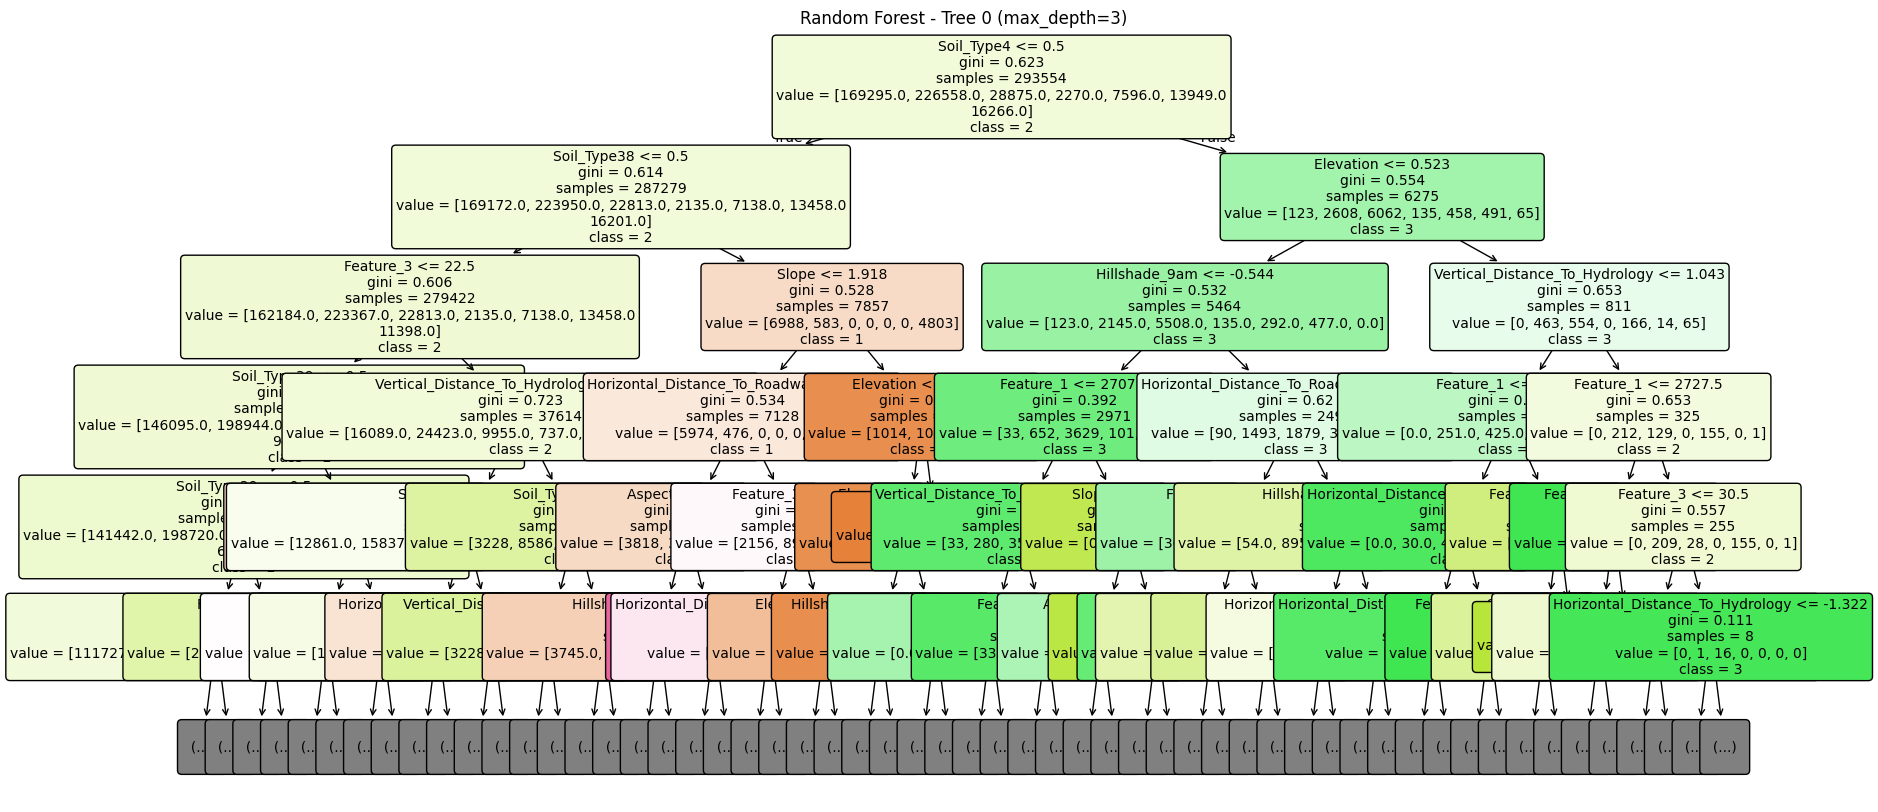

In [50]:
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], 
            feature_names=X.columns, 
            class_names=[str(c) for c in best_rf.classes_],
            filled=True, 
            max_depth=5,  
            rounded=True,
            fontsize=10)
plt.title("Random Forest - Tree 0 (max_depth=3)")
plt.show()


C:\Users\MOHAMED\AppData\Local\Temp\ipykernel_296\3635277422.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values[:20], y=feat_importance.index[:20], palette='Blues_r')


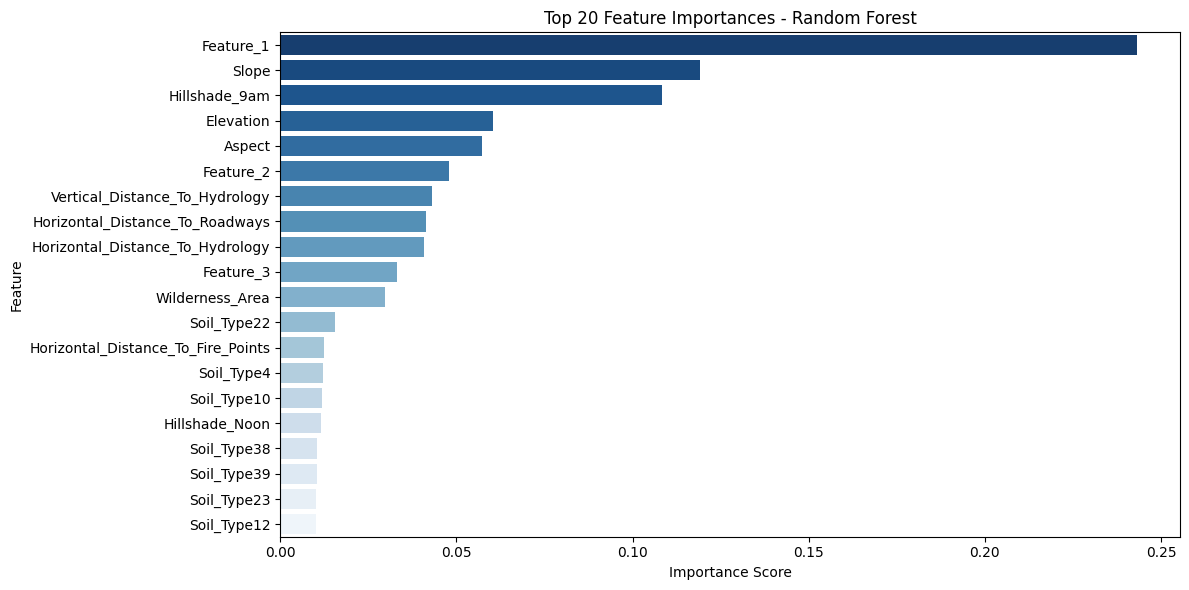

In [51]:
importances = best_rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importance.values[:20], y=feat_importance.index[:20], palette='Blues_r')
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


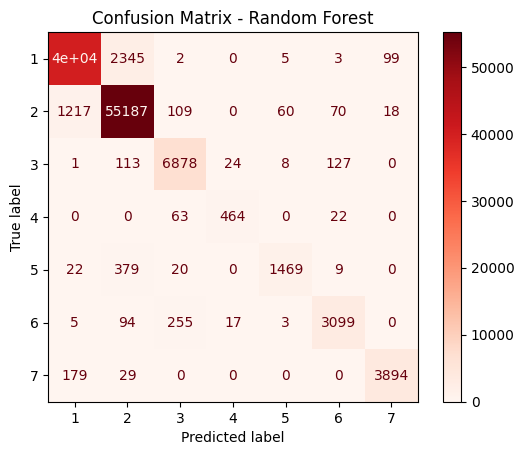

In [ ]:
y_pred_rf = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Reds', xticks_rotation=0)
plt.title("Confusion Matrix - Random Forest")
plt.show()


#### XGBoost

In [63]:
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_adj)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test_adj, y_pred_xgb)

print(f"XGBoost Accuracy: {acc_xgb:.4f}")

c:\Users\MOHAMED\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8702


## XGBoost vs RandomForest 
##### XGBoost : 87% accuracy
##### RandomForest : 95% accuracy 